# Make week11 vs week 21 scatterplot maps

In [2]:
import pandas as pd
import numpy as np
import os
#import rasterio
from IPython.display import Image
from shutil import rmtree
from dateutil import parser
import toyplot

import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

In [3]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import imageio

In [5]:
inat_flowering = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_17924/3403387022.py:1: DtypeWarning: Columns (14,29) have mixed types. Specify dtype option on import or set low_memory=False.
  inat_flowering = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')


In [14]:
inat_flowering = inat_flowering[inat_flowering.longitude > -96]

In [6]:
inat_troch = pd.read_csv('../../../raw_inaturalist_exports/hummingbirds/observations-395877.csv')

In [7]:
days_list = []
for date in inat_troch.observed_on:
    dt = parser.parse(date)
    day_of_year = dt.timetuple().tm_yday
    days_list.append(day_of_year)
    
inat_troch['day_of_year'] = days_list

In [15]:
inat_troch = inat_troch[inat_troch.longitude > -96]

# get the maps set up

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [17]:
geometry = [Point(xy) for xy in zip(inat_flowering['longitude'], inat_flowering['latitude'])]
gdf = GeoDataFrame(inat_flowering, geometry=geometry)   

In [18]:
polygon = Polygon([(-96, 24), (-96, 54), (-59, 54), (-59, 24), (-96, 24)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

world_clipped = world.clip(polygon)

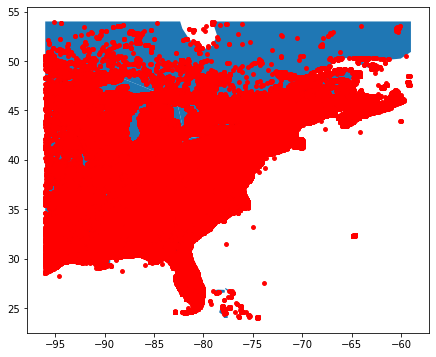

In [19]:
gdf.plot(ax=world_clipped.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

# Write out a bunch of maps (can be used to export gif or for individual maps)

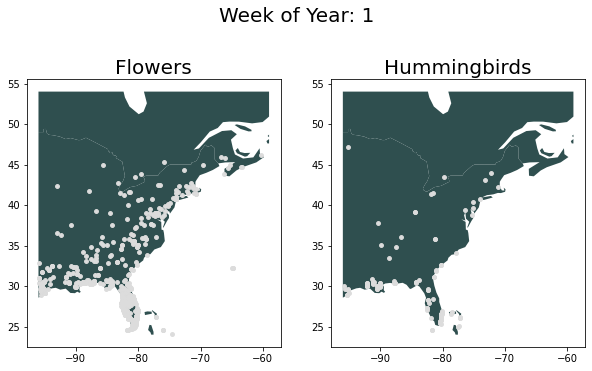

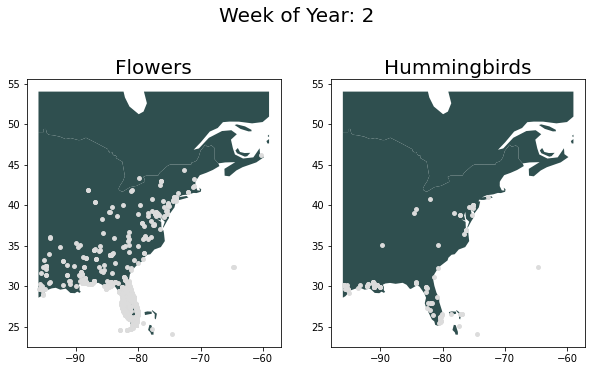

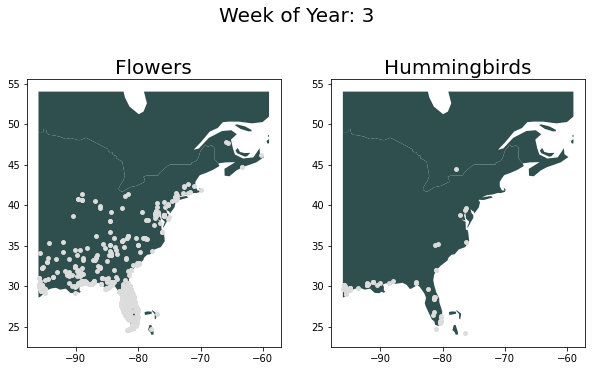

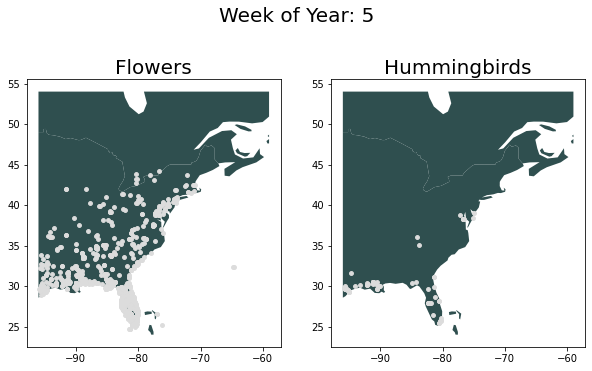

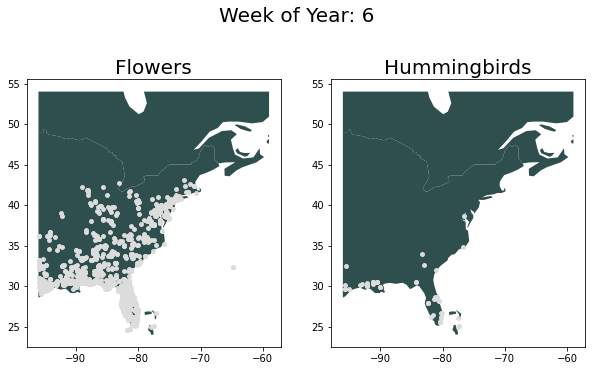

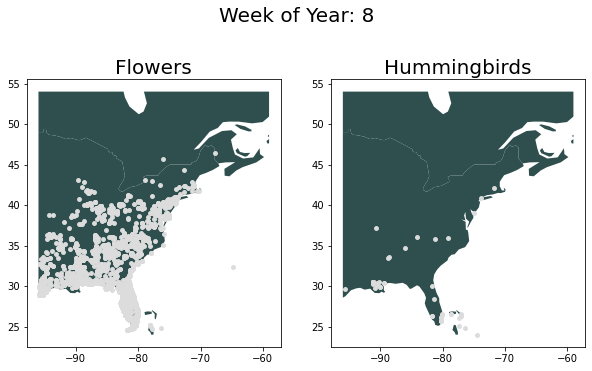

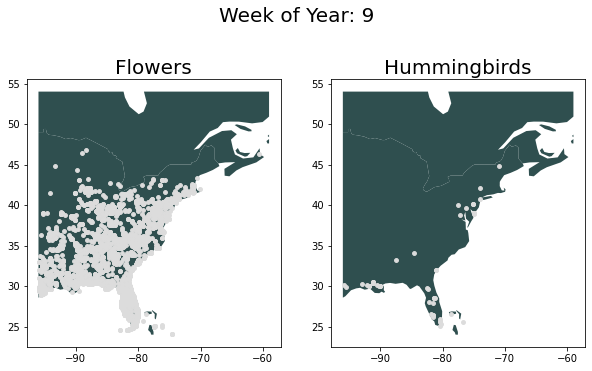

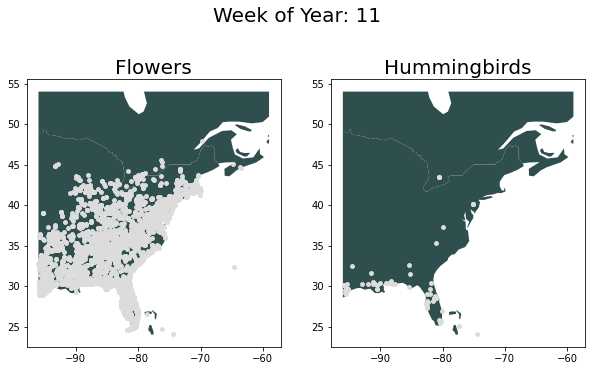

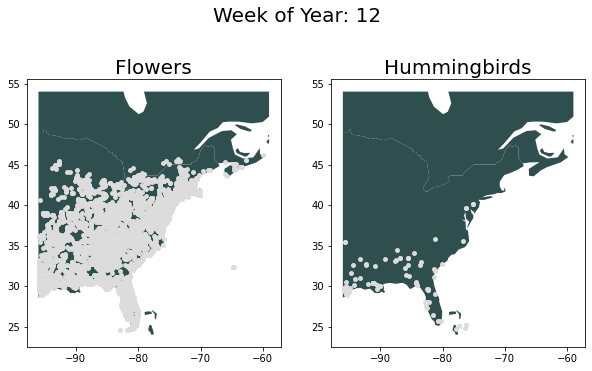

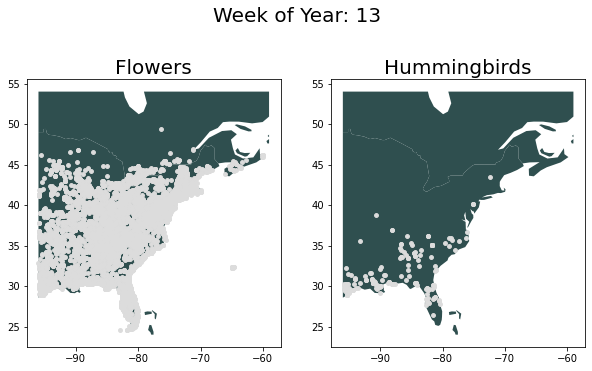

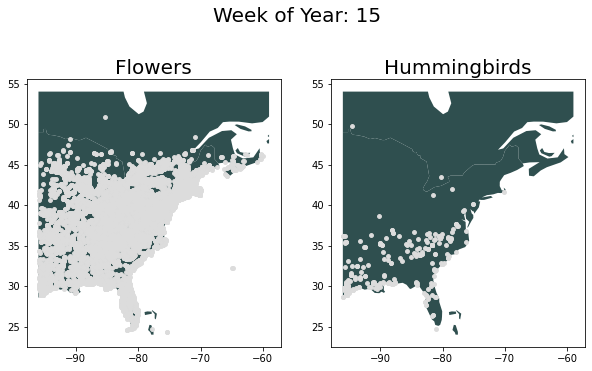

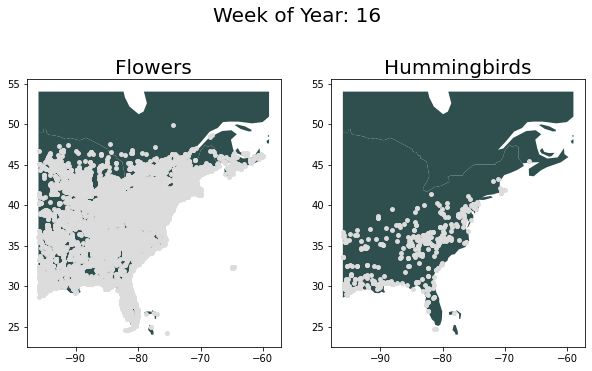

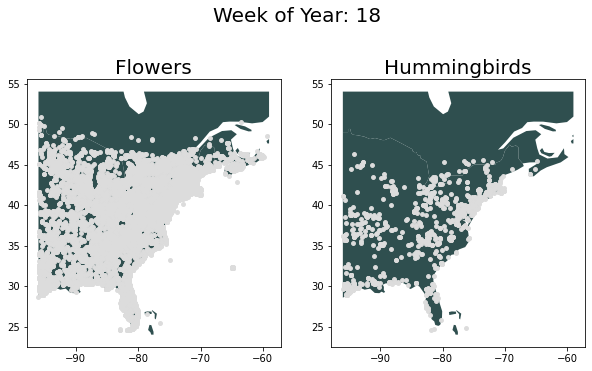

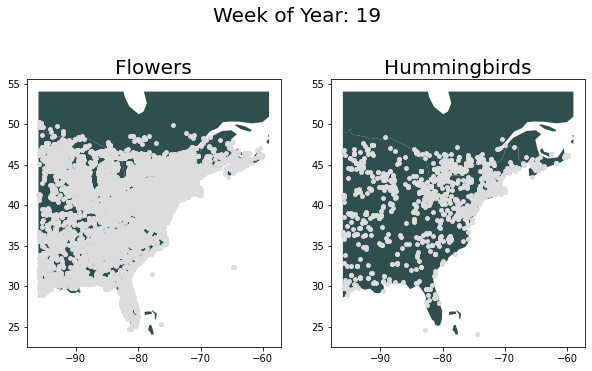

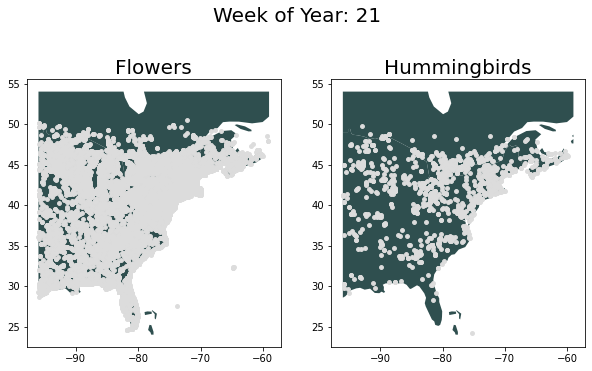

In [27]:
date_range = range(0, 150,10)
for starter_val in date_range:
    end_val = starter_val + 7

    fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw=dict(width_ratios=[1, 1]), figsize=(10, 6))
    #fig.suptitle('Days ' + str(starter_val) + '-' + str(starter_val + 15), fontsize=20)
    fig.suptitle('Week of Year: ' + str(1+(starter_val // 7)), fontsize=20)

    subdf = inat_flowering
    subdf = subdf[subdf.day_of_year.isin(list(range(starter_val, end_val)))]

    geometry = [Point(xy) for xy in zip(subdf['longitude'], subdf['latitude'])]
    gdf = GeoDataFrame(subdf, geometry=geometry)

    base_map = world_clipped.plot(ax=axs[0], figsize=(10, 6), facecolor='#2F4F4F')  # Change facecolor here
    gdf.plot(ax=base_map, marker='o', color='#DCDCDC', markersize=15, aspect=1.3)

    axs[0].set_title("Flowers", fontsize=20)

    subdf = inat_troch
    subdf = subdf[subdf.day_of_year.isin(list(range(starter_val, end_val)))]

    geometry = [Point(xy) for xy in zip(subdf['longitude'], subdf['latitude'])]
    gdf = GeoDataFrame(subdf, geometry=geometry)

    base_map = world_clipped.plot(ax=axs[1], figsize=(10, 6), facecolor='#2F4F4F')  # Change facecolor here
    gdf.plot(ax=base_map, marker='o', color='#DCDCDC', markersize=15, aspect=1.3)

    axs[1].set_title("Hummingbirds", fontsize=20)

    plt.savefig('../gif_outputs/' + str(starter_val) + '.pdf',dpi=300)
